In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
#from datetime import datetime

In [2]:
clinico = pd.read_csv('ICL_NREVSS_Clinical_Labs.csv', skiprows=1)
publico = pd.read_csv('ICL_NREVSS_Public_Health_Labs.csv', skiprows=1)
ili = pd.read_csv('ILINet.csv', skiprows=1)

# Limpeza dados 
## 1- Clinico

In [3]:
clinico.tail()

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B
233,National,X,2025,12,97442,6505,3950,10.72950,6.67577,4.05369
234,National,X,2025,13,90052,4458,3891,9.27131,4.95047,4.32084
235,National,X,2025,14,82103,2845,3415,7.62457,3.46516,4.15941
236,National,X,2025,15,74104,1771,2951,6.37213,2.38988,3.98224
237,National,X,2025,16,63566,1173,2358,5.55486,1.84533,3.70953


In [4]:
clinico = clinico.drop(columns=['REGION', 'REGION TYPE'])

In [5]:
clinico['TOTAL POSITIVE'] = clinico['TOTAL A'] + clinico['TOTAL B']

In [6]:
clinico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              238 non-null    int64  
 1   WEEK              238 non-null    int64  
 2   TOTAL SPECIMENS   238 non-null    int64  
 3   TOTAL A           238 non-null    int64  
 4   TOTAL B           238 non-null    int64  
 5   PERCENT POSITIVE  238 non-null    float64
 6   PERCENT A         238 non-null    float64
 7   PERCENT B         238 non-null    float64
 8   TOTAL POSITIVE    238 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 16.9 KB


# Limpeza dados 
## 2- Publico

In [7]:
publico.tail()

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,A (2009 H1N1),A (H3),A (Subtyping not Performed),B,BVic,BYam,H3N2v,A (H5)
233,National,X,2025,12,4324,1476,1046,262,144,143,0,0,0
234,National,X,2025,13,2685,765,477,152,133,123,0,0,0
235,National,X,2025,14,2360,688,440,104,157,127,0,0,0
236,National,X,2025,15,1632,356,183,50,121,153,0,0,0
237,National,X,2025,16,770,128,59,23,63,64,0,0,0


In [8]:
publico = publico.drop(columns=['REGION', 'REGION TYPE'])

In [9]:
publico['TOTAL A'] = publico['A (2009 H1N1)'] + publico['A (H3)'] + publico['A (Subtyping not Performed)'] + publico['A (H5)']

In [10]:
publico['TOTAL B'] = publico['B'] + publico['BVic'] + publico['BYam'] + publico['H3N2v']

In [11]:
publico['TOTAL POSITIVE'] = publico['TOTAL A'] + publico['TOTAL B']

In [12]:
publico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   YEAR                         238 non-null    int64
 1   WEEK                         238 non-null    int64
 2   TOTAL SPECIMENS              238 non-null    int64
 3   A (2009 H1N1)                238 non-null    int64
 4   A (H3)                       238 non-null    int64
 5   A (Subtyping not Performed)  238 non-null    int64
 6   B                            238 non-null    int64
 7   BVic                         238 non-null    int64
 8   BYam                         238 non-null    int64
 9   H3N2v                        238 non-null    int64
 10  A (H5)                       238 non-null    int64
 11  TOTAL A                      238 non-null    int64
 12  TOTAL B                      238 non-null    int64
 13  TOTAL POSITIVE               238 non-null    int64

In [13]:
publico = publico.drop(columns=['A (2009 H1N1)', 'A (H3)', 'A (Subtyping not Performed)', 'B', 'BVic', 'BYam', 'H3N2v', 'A (H5)'])

In [14]:
publico.tail()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,TOTAL POSITIVE
233,2025,12,4324,2784,287,3071
234,2025,13,2685,1394,256,1650
235,2025,14,2360,1232,284,1516
236,2025,15,1632,589,274,863
237,2025,16,770,210,127,337


# Unindo as tabelas e normalizando
## Clinico e publico

In [15]:
dados_somados = pd.concat([clinico, publico], ignore_index=True)
colunas_somar = ['TOTAL SPECIMENS', 'TOTAL A', 'TOTAL B', 'TOTAL POSITIVE']
gripe = dados_somados.groupby(['YEAR', 'WEEK'])[colunas_somar].sum().reset_index()

In [16]:
gripe.tail()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,TOTAL POSITIVE
233,2025,12,101766,9289,4237,13526
234,2025,13,92737,5852,4147,9999
235,2025,14,84463,4077,3699,7776
236,2025,15,75736,2360,3225,5585
237,2025,16,64336,1383,2485,3868


In [17]:
gripe.duplicated().sum()

0

In [18]:
gripe['PERCENT POSITIVE'] = (gripe['TOTAL POSITIVE'] / gripe['TOTAL SPECIMENS']) * 100
gripe['PERCENT A'] = (gripe['TOTAL A'] / gripe['TOTAL SPECIMENS']) * 100
gripe['PERCENT B'] = (gripe['TOTAL B'] / gripe['TOTAL SPECIMENS']) * 100

In [19]:
gripe.tail()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,TOTAL POSITIVE,PERCENT POSITIVE,PERCENT A,PERCENT B
233,2025,12,101766,9289,4237,13526,13.291276,9.127803,4.163473
234,2025,13,92737,5852,4147,9999,10.782104,6.310318,4.471786
235,2025,14,84463,4077,3699,7776,9.206398,4.826966,4.379432
236,2025,15,75736,2360,3225,5585,7.374300,3.116087,4.258213
237,2025,16,64336,1383,2485,3868,6.012186,2.149652,3.862534


In [20]:
def get_date(year, week):
    return datetime.date.fromisocalendar(year, week, 1) 

In [21]:
gripe['DATE'] = [get_date(y, w) for y, w in zip(gripe['YEAR'], gripe['WEEK'])]

In [22]:
gripe['DATE'] = pd.to_datetime(gripe['DATE'])

In [23]:
gripe.duplicated(subset=['DATE']).sum()

0

In [24]:
gripe['MONTH'] = gripe['DATE'].dt.month

In [25]:
gripe['SEASON'] = pd.cut(
    gripe['MONTH'], 
    bins=[0, 3, 6, 9, 12], 
    labels=['Inverno', 'Primavera', 'Verao', 'Outono'],
    include_lowest=True
)

In [26]:
gripe.tail()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,TOTAL POSITIVE,PERCENT POSITIVE,PERCENT A,PERCENT B,DATE,MONTH,SEASON
233,2025,12,101766,9289,4237,13526,13.291276,9.127803,4.163473,2025-03-17,3,Inverno
234,2025,13,92737,5852,4147,9999,10.782104,6.310318,4.471786,2025-03-24,3,Inverno
235,2025,14,84463,4077,3699,7776,9.206398,4.826966,4.379432,2025-03-31,3,Inverno
236,2025,15,75736,2360,3225,5585,7.374300,3.116087,4.258213,2025-04-07,4,Primavera
237,2025,16,64336,1383,2485,3868,6.012186,2.149652,3.862534,2025-04-14,4,Primavera


In [27]:
gripe.drop(columns=['MONTH'], inplace=True)

# Análise exploratória

In [28]:
gripe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   YEAR              238 non-null    int64         
 1   WEEK              238 non-null    int64         
 2   TOTAL SPECIMENS   238 non-null    int64         
 3   TOTAL A           238 non-null    int64         
 4   TOTAL B           238 non-null    int64         
 5   TOTAL POSITIVE    238 non-null    int64         
 6   PERCENT POSITIVE  238 non-null    float64       
 7   PERCENT A         238 non-null    float64       
 8   PERCENT B         238 non-null    float64       
 9   DATE              238 non-null    datetime64[ns]
 10  SEASON            238 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(6)
memory usage: 19.2 KB


In [29]:
gripe.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,238.0,2022.521008,1.373951,2020.000000,2021.000000,2023.000000,2024.000000,2025.000000
WEEK,238.0,26.466387,15.671096,1.000000,12.250000,26.000000,41.000000,53.000000
TOTAL SPECIMENS,238.0,82257.613445,40326.881720,23825.000000,51249.500000,75920.500000,100711.750000,217213.000000
TOTAL A,238.0,5606.647059,11163.937912,4.000000,251.000000,695.500000,5410.000000,61677.000000
TOTAL B,238.0,772.096639,1679.050197,10.000000,39.000000,91.500000,352.500000,8731.000000
TOTAL POSITIVE,238.0,6378.743697,11850.030563,17.000000,345.750000,929.500000,6132.750000,64491.000000
PERCENT POSITIVE,238.0,4.996564,7.308105,0.044840,0.452251,1.416024,6.459648,34.558431
PERCENT A,238.0,4.258455,6.718006,0.013317,0.405505,1.106271,5.357360,33.296264
PERCENT B,238.0,0.738109,1.449113,0.017278,0.053666,0.116696,0.525440,7.148940


<Axes: >

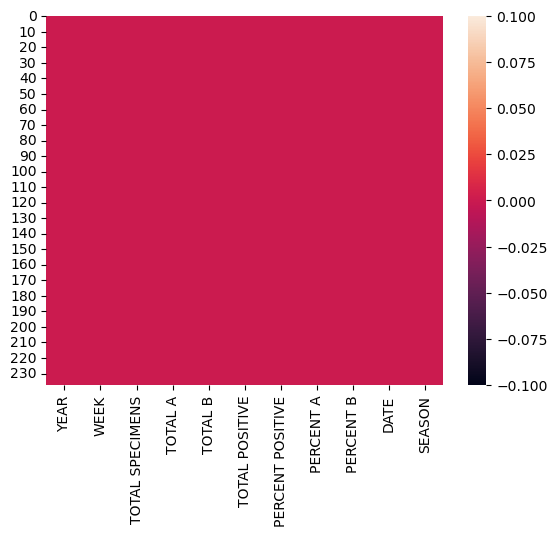

In [30]:
sns.heatmap(gripe.isnull())

In [31]:
gripe.corr(numeric_only=True)

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,TOTAL POSITIVE,PERCENT POSITIVE,PERCENT A,PERCENT B
YEAR,1.000000,-0.278239,0.290609,0.334697,0.489210,0.384636,0.476726,0.407550,0.514827
WEEK,-0.278239,1.000000,-0.047505,-0.044378,-0.293504,-0.083395,-0.142943,-0.089630,-0.305365
TOTAL SPECIMENS,0.290609,-0.047505,1.000000,0.768586,0.380605,0.778015,0.773044,0.779806,0.283448
TOTAL A,0.334697,-0.044378,0.768586,1.000000,0.345976,0.991124,0.947910,0.979688,0.238679
TOTAL B,0.489210,-0.293504,0.380605,0.345976,1.000000,0.467636,0.577296,0.418025,0.973456
TOTAL POSITIVE,0.384636,-0.083395,0.778015,0.991124,0.467636,1.000000,0.974826,0.982197,0.362790
PERCENT POSITIVE,0.476726,-0.142943,0.773044,0.947910,0.577296,0.974826,1.000000,0.982160,0.489918
PERCENT A,0.407550,-0.089630,0.779806,0.979688,0.418025,0.982197,0.982160,1.000000,0.317246
PERCENT B,0.514827,-0.305365,0.283448,0.238679,0.973456,0.362790,0.489918,0.317246,1.000000


<Axes: >

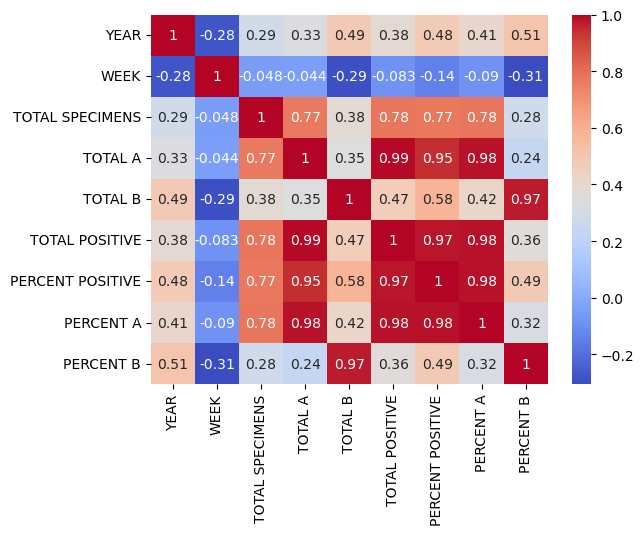

In [32]:
sns.heatmap(gripe.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: >

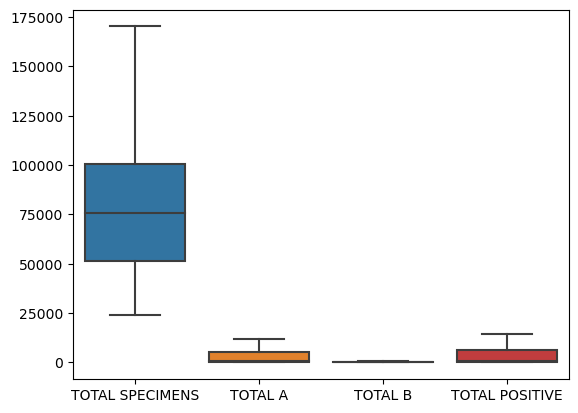

In [33]:
sns.boxplot(data=gripe[['TOTAL SPECIMENS', 'TOTAL A', 'TOTAL B', 'TOTAL POSITIVE']], showfliers=False)

<Axes: xlabel='SEASON', ylabel='TOTAL POSITIVE'>

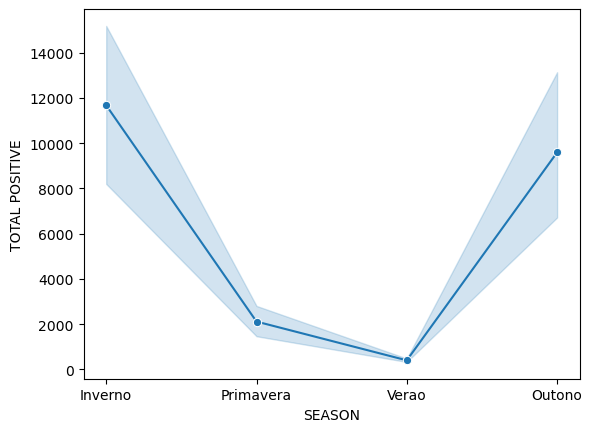

In [34]:
sns.lineplot(data=gripe, x='SEASON', y='TOTAL POSITIVE', marker='o')

<Axes: xlabel='YEAR', ylabel='TOTAL POSITIVE'>

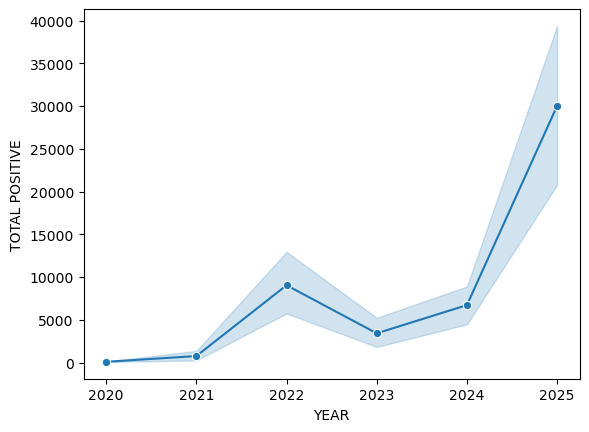

In [35]:
sns.lineplot(data=gripe, x='YEAR', y='TOTAL POSITIVE', marker='o')

<Axes: xlabel='SEASON', ylabel='TOTAL POSITIVE'>

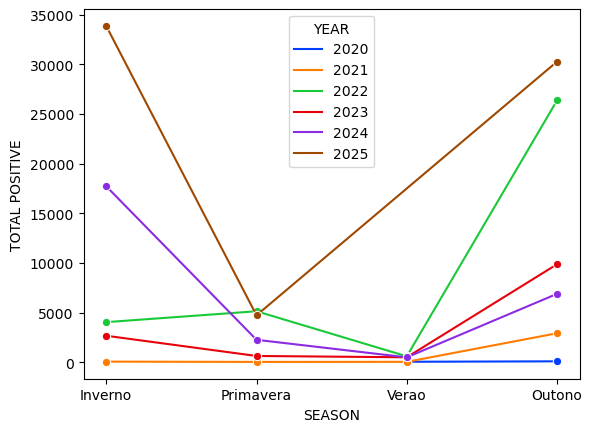

In [36]:
sns.lineplot(data=gripe, x='SEASON', y='TOTAL POSITIVE', hue='YEAR', marker='o', palette='bright', errorbar=None)

<Axes: xlabel='SEASON', ylabel='PERCENT POSITIVE'>

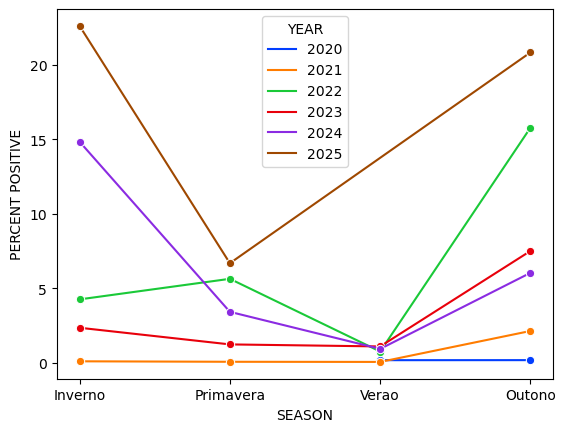

In [37]:
sns.lineplot(data=gripe, x='SEASON', y='PERCENT POSITIVE', hue='YEAR', marker='o', palette='bright', errorbar=None)

<Axes: xlabel='SEASON', ylabel='Count'>

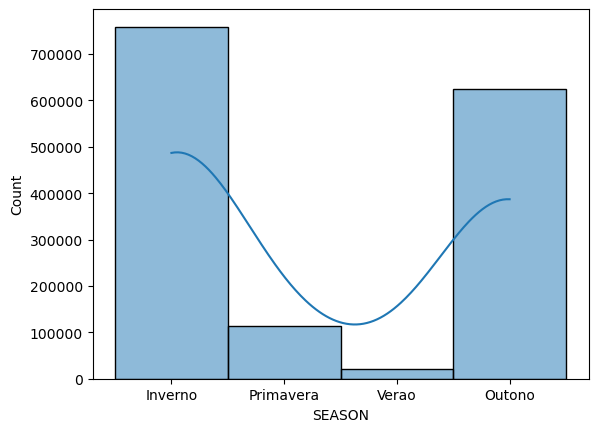

In [38]:
sns.histplot(data=gripe, x='SEASON', weights='TOTAL POSITIVE', kde=True)

<Axes: xlabel='SEASON', ylabel='TOTAL POSITIVE'>

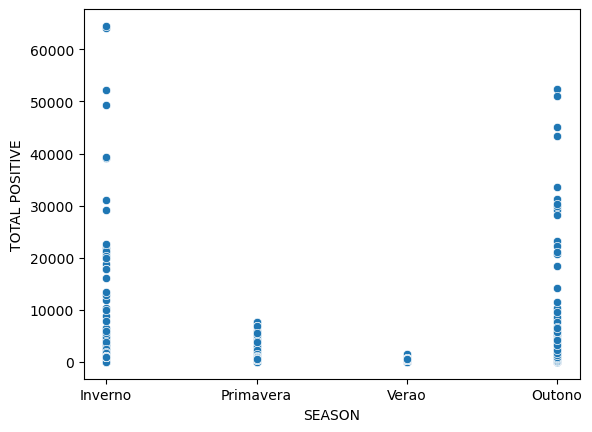

In [39]:
sns.scatterplot(data=gripe, x='SEASON', y='TOTAL POSITIVE')

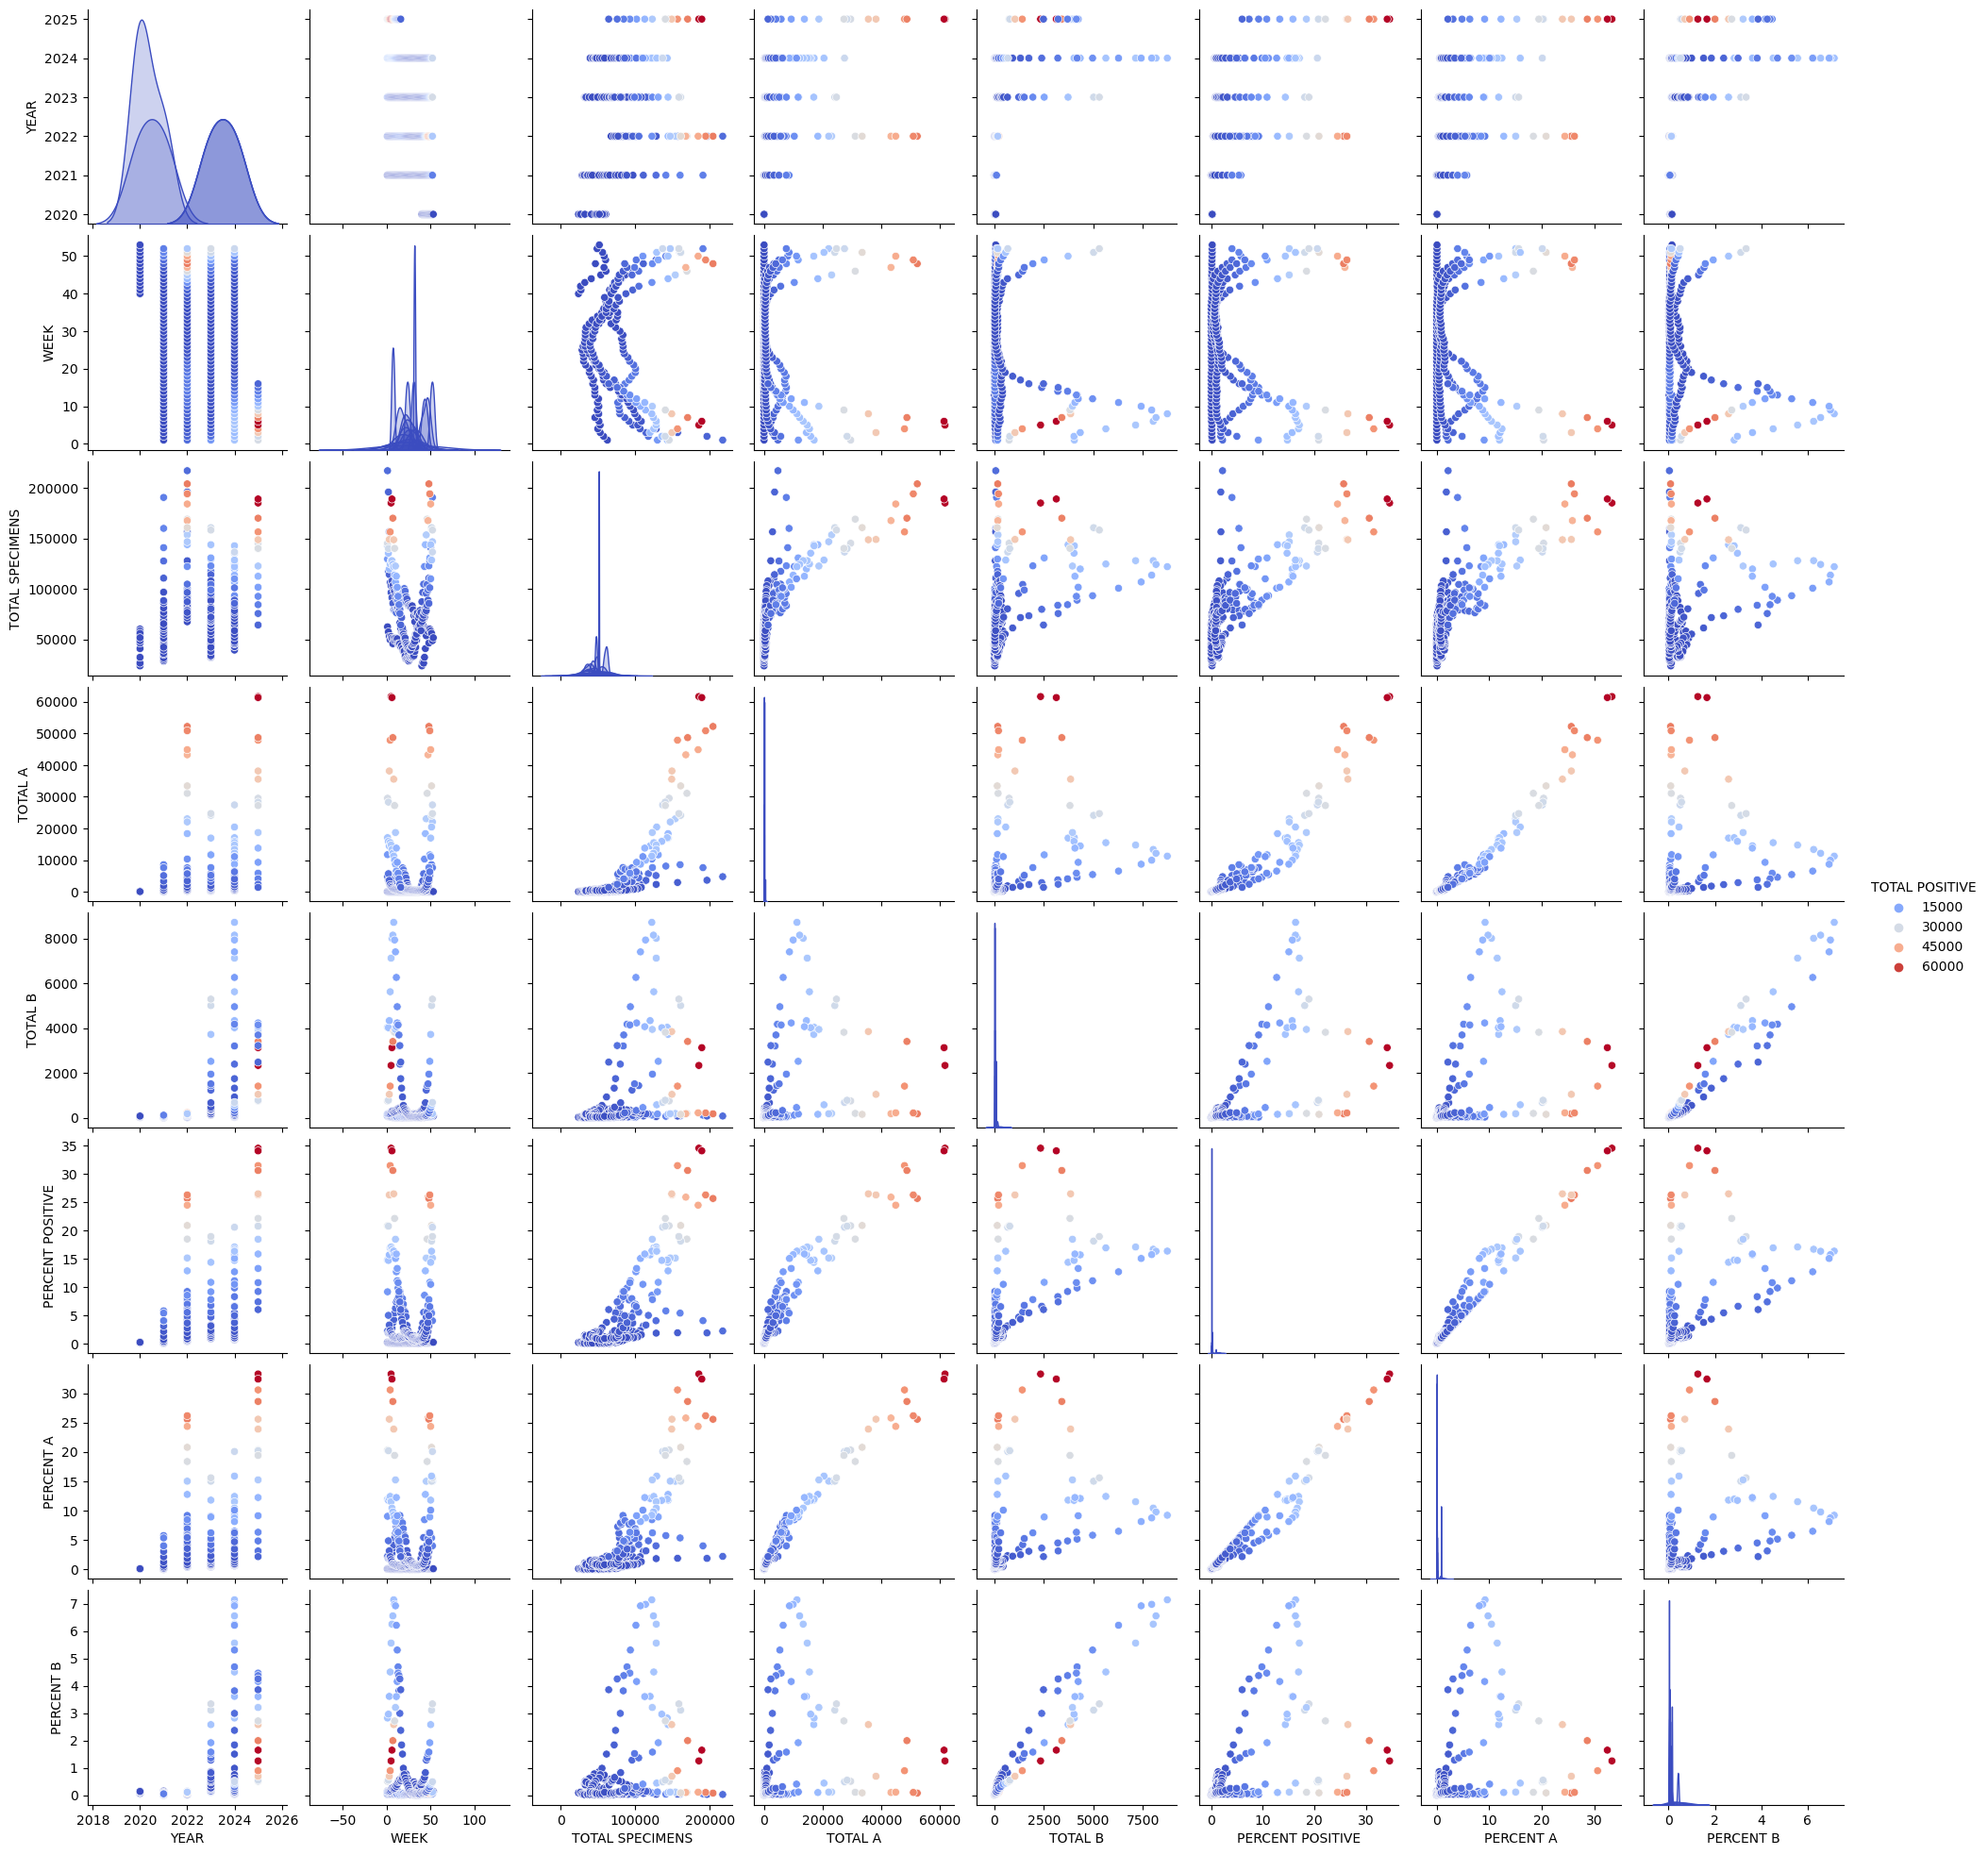

In [40]:
sns.pairplot(gripe, diag_kind='kde', hue='TOTAL POSITIVE', palette='coolwarm')

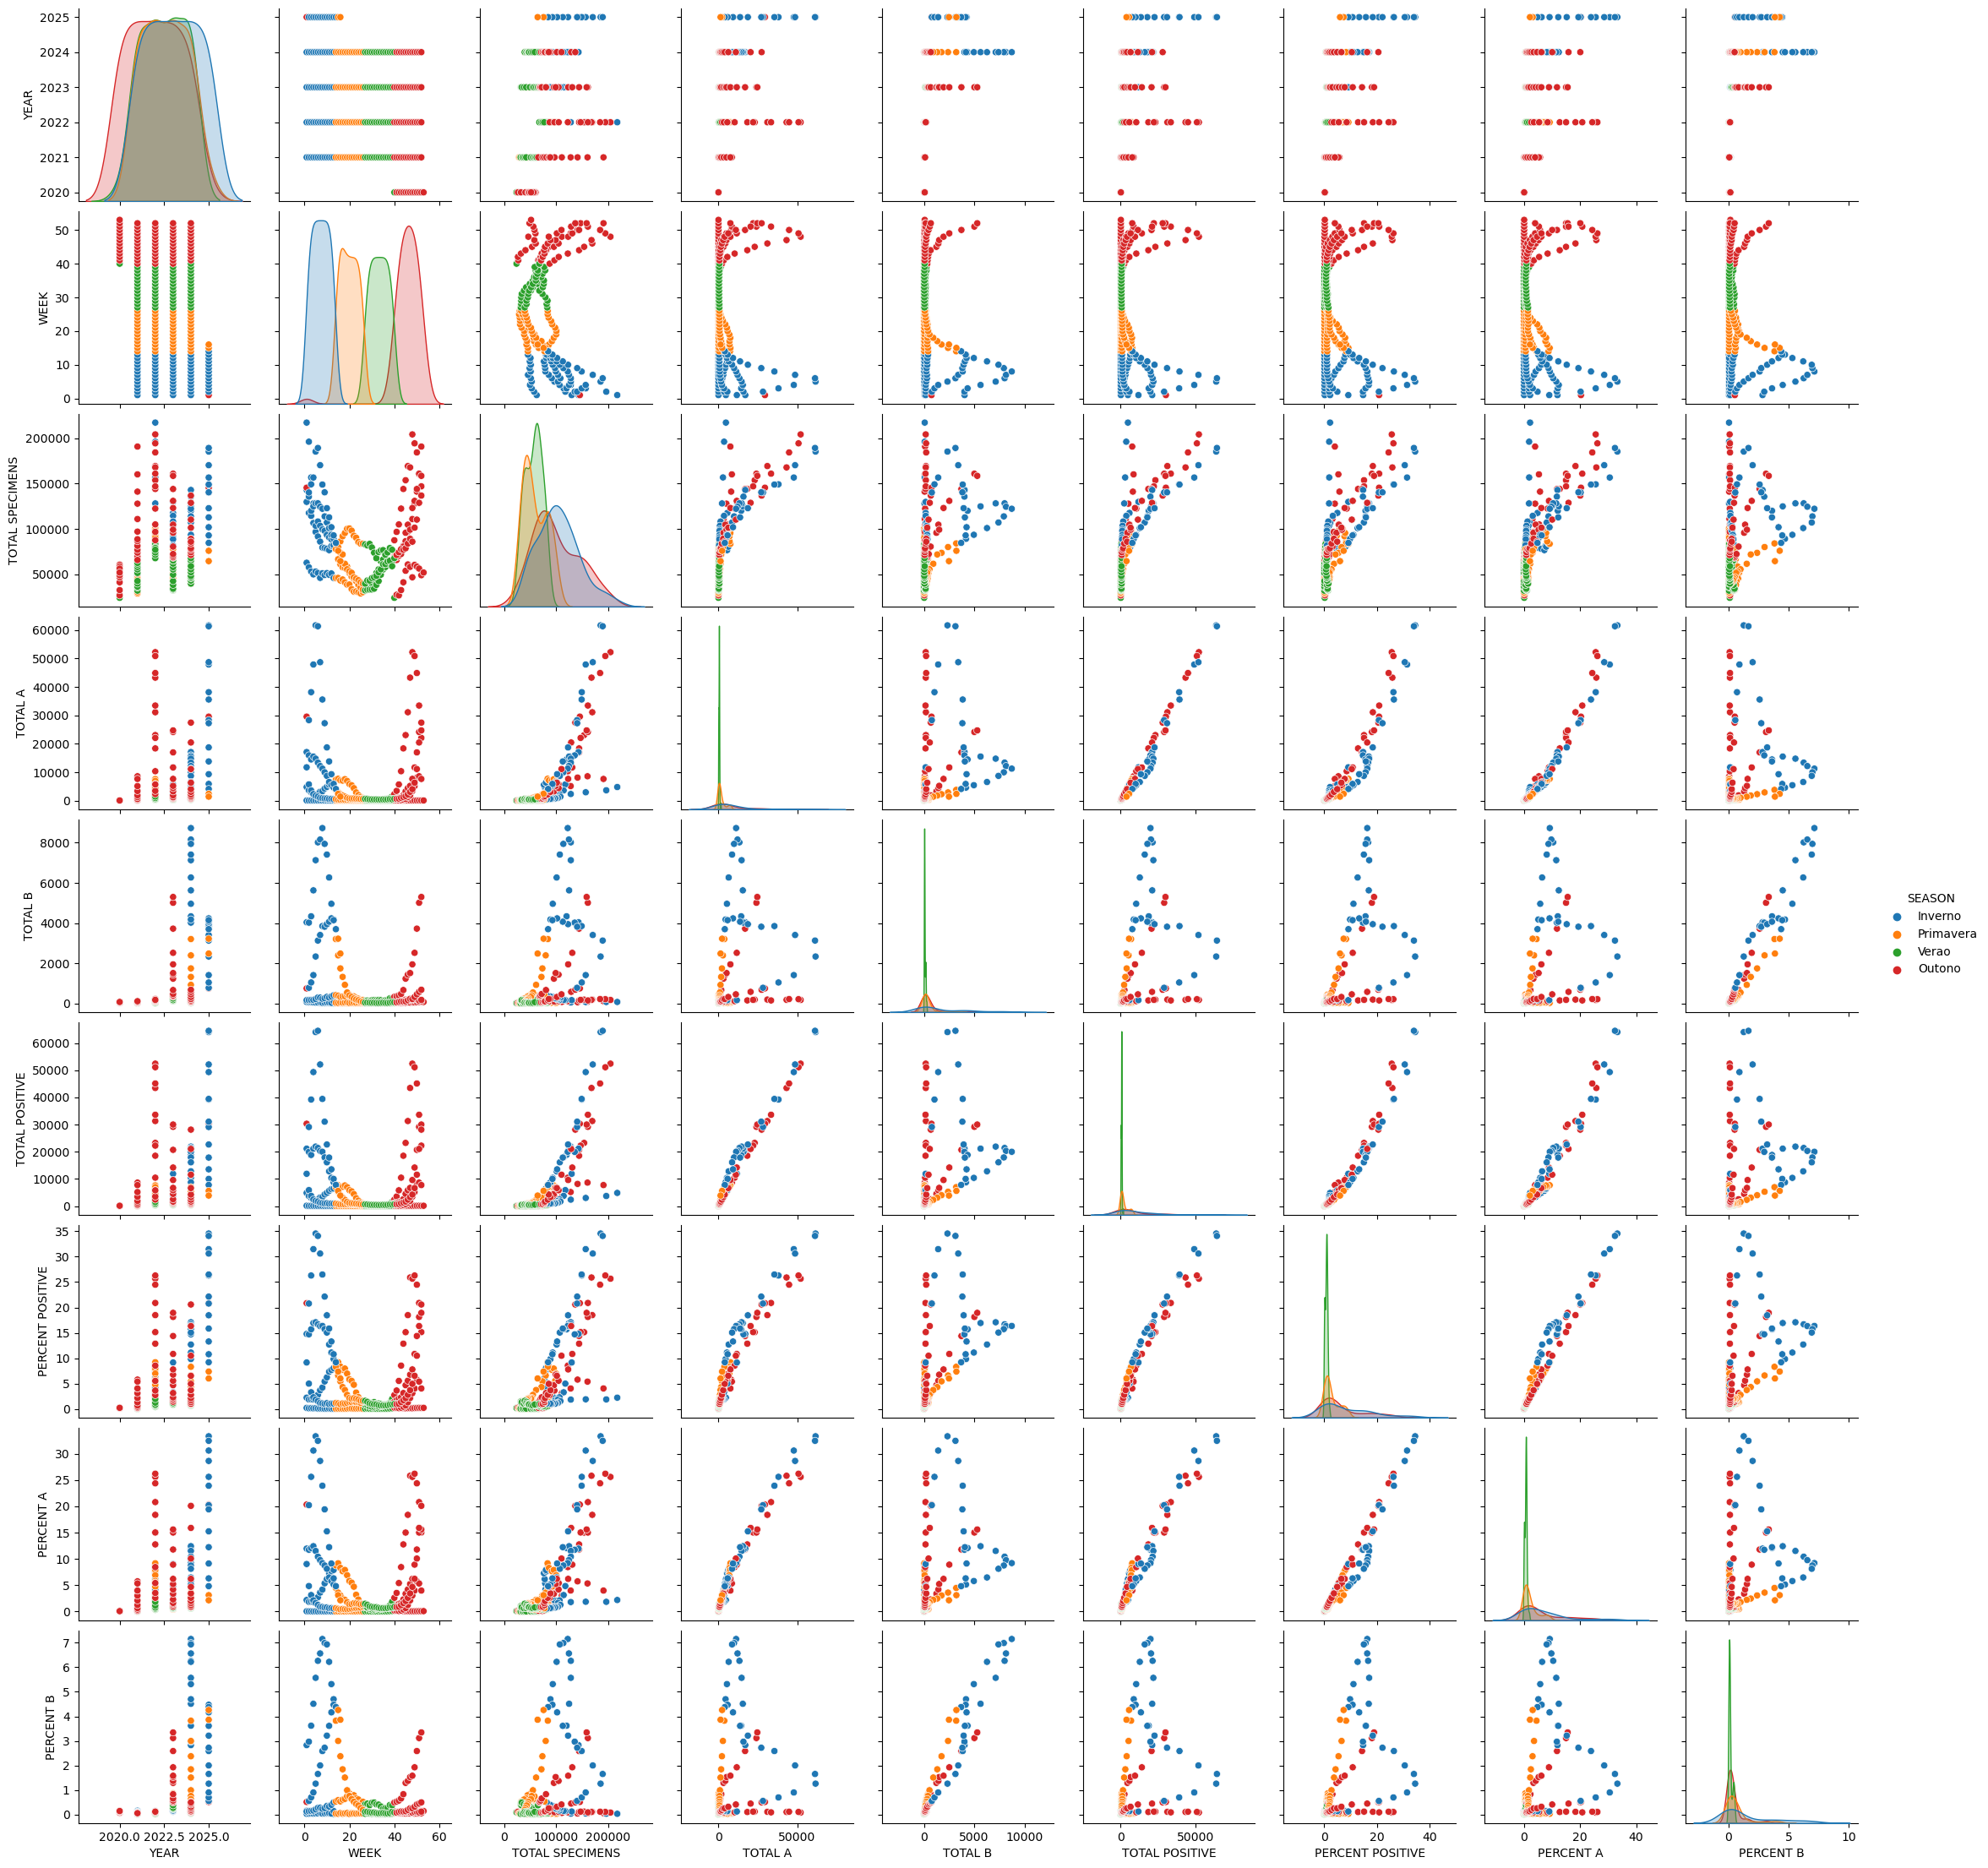

In [41]:
sns.pairplot(gripe, diag_kind='kde', hue='SEASON', palette='tab10')

<Axes: xlabel='SEASON', ylabel='TOTAL POSITIVE'>

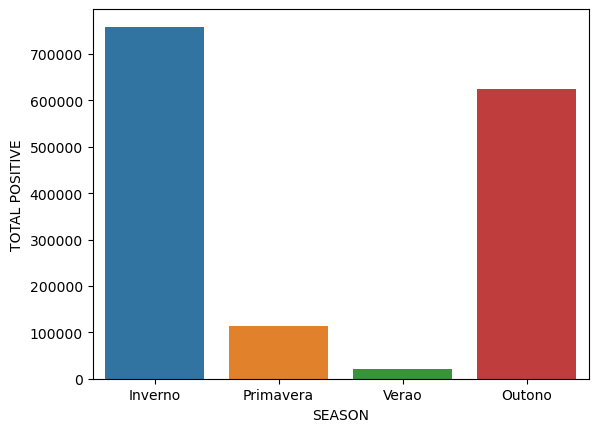

In [42]:
sns.barplot(data=gripe, x='SEASON', y='TOTAL POSITIVE', estimator=sum, errorbar=None)

# Normalização

In [43]:
gripe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   YEAR              238 non-null    int64         
 1   WEEK              238 non-null    int64         
 2   TOTAL SPECIMENS   238 non-null    int64         
 3   TOTAL A           238 non-null    int64         
 4   TOTAL B           238 non-null    int64         
 5   TOTAL POSITIVE    238 non-null    int64         
 6   PERCENT POSITIVE  238 non-null    float64       
 7   PERCENT A         238 non-null    float64       
 8   PERCENT B         238 non-null    float64       
 9   DATE              238 non-null    datetime64[ns]
 10  SEASON            238 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(6)
memory usage: 19.2 KB


In [44]:
gripe.head()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,TOTAL POSITIVE,PERCENT POSITIVE,PERCENT A,PERCENT B,DATE,SEASON
0,2020,40,23825,22,23,45,0.188877,0.092340,0.096537,2020-09-28,Verao
1,2020,41,27162,38,34,72,0.265076,0.139901,0.125175,2020-10-05,Outono
2,2020,42,26512,32,31,63,0.237628,0.120700,0.116928,2020-10-12,Outono
3,2020,43,32355,34,25,59,0.182352,0.105084,0.077268,2020-10-19,Outono
4,2020,44,40976,30,35,65,0.158629,0.073214,0.085416,2020-10-26,Outono


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
if gripe['DATE'].dtype == 'datetime64[ns]':
    gripe['DATE_ORD'] = gripe['DATE'].map(pd.Timestamp.toordinal)
else:
    gripe['DATE_ORD'] = gripe['DATE']

In [47]:
cols_para_normalizar = ['DATE_ORD', 'TOTAL SPECIMENS', 'TOTAL A', 'TOTAL B']

In [48]:
scaler = StandardScaler()
gripe_normalizado = gripe.copy()
gripe_normalizado[cols_para_normalizar] = scaler.fit_transform(gripe[cols_para_normalizar])

In [49]:
gripe_normalizado[cols_para_normalizar + ['DATE']].head()

,DATE_ORD,TOTAL SPECIMENS,TOTAL A,TOTAL B,DATE
0,-1.724789,-1.452028,-0.501294,-0.447083,2020-09-28
1,-1.710233,-1.369105,-0.499858,-0.440518,2020-10-05
2,-1.695678,-1.385257,-0.500397,-0.442309,2020-10-12
3,-1.681123,-1.240061,-0.500217,-0.445890,2020-10-19
4,-1.666568,-1.025832,-0.500576,-0.439921,2020-10-26


# Utilizando o ML

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [51]:
gripe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   YEAR              238 non-null    int64         
 1   WEEK              238 non-null    int64         
 2   TOTAL SPECIMENS   238 non-null    int64         
 3   TOTAL A           238 non-null    int64         
 4   TOTAL B           238 non-null    int64         
 5   TOTAL POSITIVE    238 non-null    int64         
 6   PERCENT POSITIVE  238 non-null    float64       
 7   PERCENT A         238 non-null    float64       
 8   PERCENT B         238 non-null    float64       
 9   DATE              238 non-null    datetime64[ns]
 10  SEASON            238 non-null    category      
 11  DATE_ORD          238 non-null    int64         
dtypes: category(1), datetime64[ns](1), float64(3), int64(7)
memory usage: 21.0 KB


In [52]:
gripe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   YEAR              238 non-null    int64         
 1   WEEK              238 non-null    int64         
 2   TOTAL SPECIMENS   238 non-null    int64         
 3   TOTAL A           238 non-null    int64         
 4   TOTAL B           238 non-null    int64         
 5   TOTAL POSITIVE    238 non-null    int64         
 6   PERCENT POSITIVE  238 non-null    float64       
 7   PERCENT A         238 non-null    float64       
 8   PERCENT B         238 non-null    float64       
 9   DATE              238 non-null    datetime64[ns]
 10  SEASON            238 non-null    category      
 11  DATE_ORD          238 non-null    int64         
dtypes: category(1), datetime64[ns](1), float64(3), int64(7)
memory usage: 21.0 KB


In [53]:
print([col for col in gripe.columns if col.startswith('SEASON_')])


[]


In [54]:
# Lista de possíveis colunas dummy de estação
season_columns = [col for col in gripe.columns if col.startswith('SEASON_') and col != 'SEASON']

# Verifica se todas existem
if len(season_columns) == 4:
    gripe['SEASON'] = gripe[season_columns].idxmax(axis=1).str.replace('SEASON_', '')
    season_map = {'Primavera': 1, 'Verao': 2, 'Outono': 3, 'Inverno': 4}
    gripe['SEASON_NUM'] = gripe['SEASON'].map(season_map)
    gripe['SEASON_SIN'] = np.sin(2 * np.pi * gripe['SEASON_NUM']/4)
    gripe['SEASON_COS'] = np.cos(2 * np.pi * gripe['SEASON_NUM']/4)
else:
    print("⚠️ Nem todas as colunas dummy de estação estão presentes:", season_columns)
    # Alternativa: atribuir valores default ou tratar conforme necessário


⚠️ Nem todas as colunas dummy de estação estão presentes: []


In [55]:
# %% [code] -- Célula 2 Corrigida: Codificação Cíclica das Estações
import numpy as np

# Verificar valores únicos em 'SEASON'
print("Valores únicos em 'SEASON':", gripe['SEASON'].unique())

# Mapear estações para números
season_map = {
    'Primavera': 1,
    'Verao': 2,
    'Outono': 3,
    'Inverno': 4
}

# Converter para string e mapear
gripe['SEASON_NUM'] = gripe['SEASON'].astype(str).map(season_map)

# Verificar se há valores NaN
print("Valores faltantes em SEASON_NUM:", gripe['SEASON_NUM'].isna().sum())

# Codificação cíclica para estações
gripe['SEASON_SIN'] = np.sin(2 * np.pi * gripe['SEASON_NUM']/4)
gripe['SEASON_COS'] = np.cos(2 * np.pi * gripe['SEASON_NUM']/4)

# Mostrar resultado
print(gripe[['DATE', 'SEASON', 'SEASON_NUM', 'SEASON_SIN', 'SEASON_COS']].head(3))

# %% [code] -- Célula 3: Engenharia de Features Corrigida
# Interação entre subtipos virais
gripe['PERCENT_A_B_RATIO'] = gripe['PERCENT A'] / (gripe['PERCENT B'] + 1e-6)

# Médias móveis
gripe['PERCENT_POSITIVE_MEAN3'] = gripe['PERCENT POSITIVE'].rolling(3).mean()
gripe['PERCENT_A_MEAN3'] = gripe['PERCENT A'].rolling(3).mean()

# Codificação cíclica para SEMANA (usando a coluna WEEK que já existe)
gripe['WEEK_SIN'] = np.sin(2 * np.pi * gripe['WEEK'] / 52)
gripe['WEEK_COS'] = np.cos(2 * np.pi * gripe['WEEK'] / 52)

# Lags temporais
gripe['PERCENT_POSITIVE_LAG1'] = gripe['PERCENT POSITIVE'].shift(1)
gripe['PERCENT_POSITIVE_LAG2'] = gripe['PERCENT POSITIVE'].shift(2)
gripe['TOTAL_SPECIMENS_LAG1'] = gripe['TOTAL SPECIMENS'].shift(1)

# Remover NaNs gerados pelas médias móveis e lags
gripe = gripe.dropna().reset_index(drop=True)

print(f"Shape após limpeza: {gripe.shape}")
print(f"Colunas disponíveis: {gripe.columns.tolist()}")


Valores únicos em 'SEASON': ['Verao', 'Outono', 'Inverno', 'Primavera']
Categories (4, object): ['Inverno' < 'Primavera' < 'Verao' < 'Outono']
Valores faltantes em SEASON_NUM: 0
        DATE  SEASON  SEASON_NUM    SEASON_SIN    SEASON_COS
0 2020-09-28   Verao           2  1.224647e-16 -1.000000e+00
1 2020-10-05  Outono           3 -1.000000e+00 -1.836970e-16
2 2020-10-12  Outono           3 -1.000000e+00 -1.836970e-16
Shape após limpeza: (236, 23)
Colunas disponíveis: ['YEAR', 'WEEK', 'TOTAL SPECIMENS', 'TOTAL A', 'TOTAL B', 'TOTAL POSITIVE', 'PERCENT POSITIVE', 'PERCENT A', 'PERCENT B', 'DATE', 'SEASON', 'DATE_ORD', 'SEASON_NUM', 'SEASON_SIN', 'SEASON_COS', 'PERCENT_A_B_RATIO', 'PERCENT_POSITIVE_MEAN3', 'PERCENT_A_MEAN3', 'WEEK_SIN', 'WEEK_COS', 'PERCENT_POSITIVE_LAG1', 'PERCENT_POSITIVE_LAG2', 'TOTAL_SPECIMENS_LAG1']


Colunas disponíveis: ['YEAR', 'WEEK', 'TOTAL SPECIMENS', 'TOTAL A', 'TOTAL B', 'TOTAL POSITIVE', 'PERCENT POSITIVE', 'PERCENT A', 'PERCENT B', 'DATE', 'SEASON', 'DATE_ORD', 'SEASON_NUM', 'SEASON_SIN', 'SEASON_COS', 'PERCENT_A_B_RATIO', 'PERCENT_POSITIVE_MEAN3', 'PERCENT_A_MEAN3', 'WEEK_SIN', 'WEEK_COS', 'PERCENT_POSITIVE_LAG1', 'PERCENT_POSITIVE_LAG2', 'TOTAL_SPECIMENS_LAG1']
Shape inicial: (236, 23)
Valores únicos em 'SEASON': ['Outono', 'Inverno', 'Primavera', 'Verao']
Categories (4, object): ['Inverno' < 'Primavera' < 'Verao' < 'Outono']
Valores faltantes em SEASON_NUM: 0
Shape antes da limpeza: (236, 23)
Shape após limpeza: (234, 23)
✅ Todas as features estão disponíveis!
Shape final - X: (234, 12), y: (234,)
Divisão dos dados:
Treino: 187 amostras
Teste: 47 amostras
Período de treino: 2020-10-26 00:00:00 até 2024-05-20 00:00:00
Período de teste: 2024-05-27 00:00:00 até 2025-04-14 00:00:00
Treinando modelo...

🔍 Métricas de Desempenho:
MAE: 3308.41
R²: 0.8100

🎯 Importância das Fea

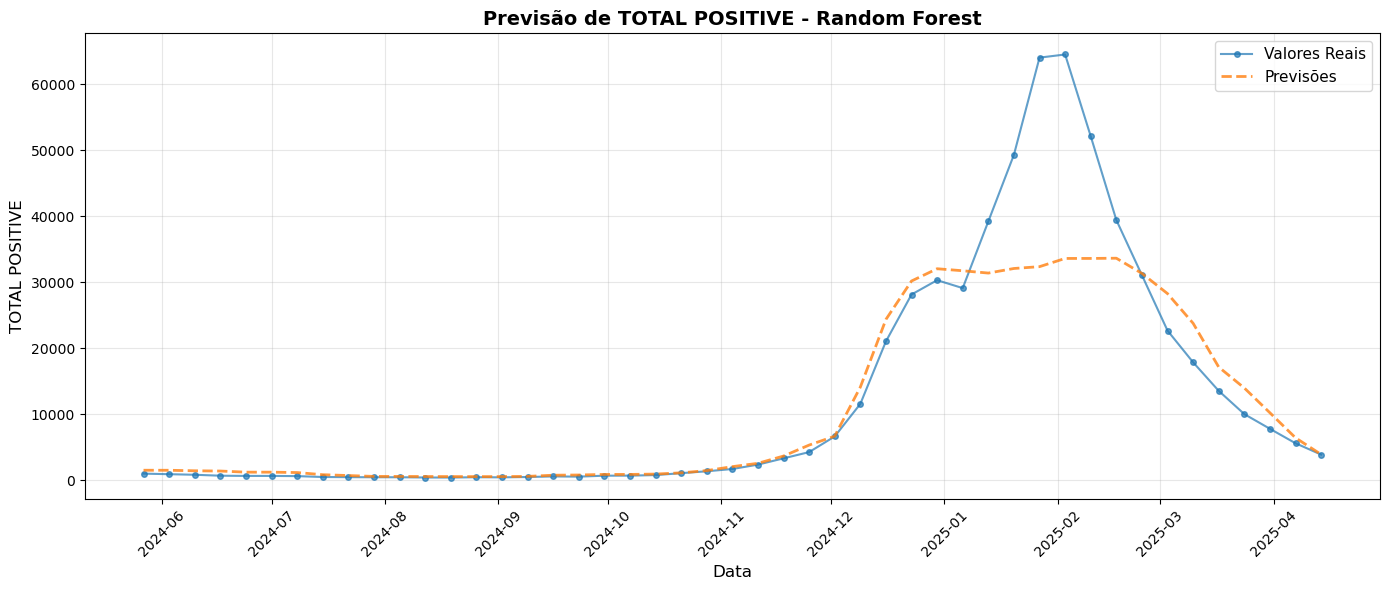

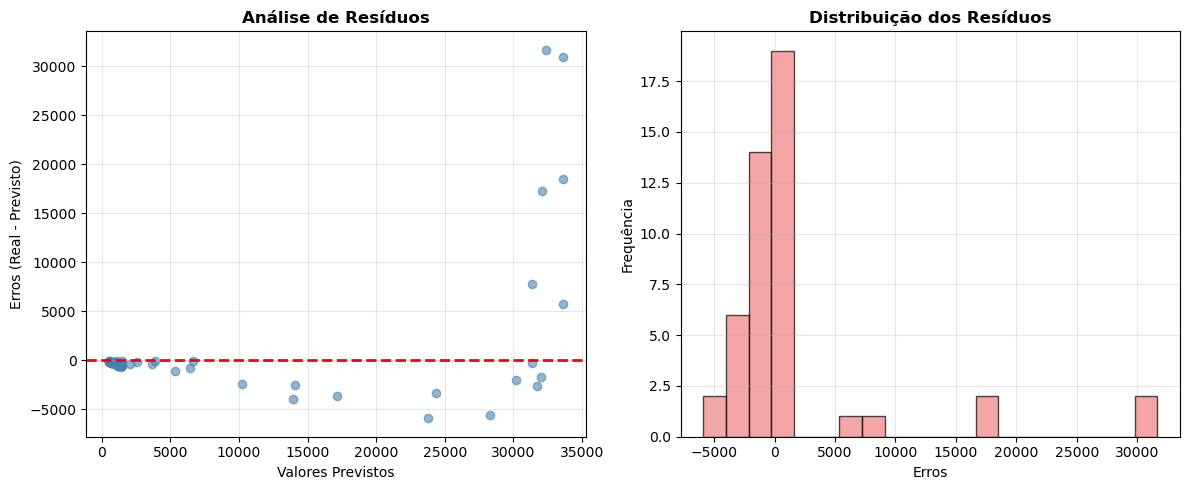


📊 Estatísticas dos Resíduos:
Média dos resíduos: 1455.3655
Desvio padrão dos resíduos: 7704.8456
Valor mínimo real: 385.00
Valor máximo real: 64491.00
Valor mínimo previsto: 529.15
Valor máximo previsto: 33621.73


In [56]:
# %% [code] -- Célula 1: Importações
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# %% [code] -- Célula 2: Engenharia de Features Corrigida
# Verificar colunas disponíveis
print("Colunas disponíveis:", gripe.columns.tolist())
print("Shape inicial:", gripe.shape)

# Interação entre subtipos virais
gripe['PERCENT_A_B_RATIO'] = gripe['PERCENT A'] / (gripe['PERCENT B'] + 1e-6)  # Evita divisão por zero

# Médias móveis
gripe['PERCENT_POSITIVE_MEAN3'] = gripe['PERCENT POSITIVE'].rolling(3).mean()
gripe['PERCENT_A_MEAN3'] = gripe['PERCENT A'].rolling(3).mean()

# Codificação cíclica para semana do ano (usando WEEK em vez de WEEK_OF_YEAR)
gripe['WEEK_SIN'] = np.sin(2 * np.pi * gripe['WEEK'] / 52)
gripe['WEEK_COS'] = np.cos(2 * np.pi * gripe['WEEK'] / 52)

# Codificação cíclica para estação
# Verificar se SEASON existe e mapear
if 'SEASON' in gripe.columns:
    print("Valores únicos em 'SEASON':", gripe['SEASON'].unique())
    
    season_map = {
        'Primavera': 1,
        'Verao': 2,
        'Outono': 3,
        'Inverno': 4
    }
    
    # Converter para string e mapear
    gripe['SEASON_NUM'] = gripe['SEASON'].astype(str).map(season_map)
    
    # Verificar se há valores NaN
    print("Valores faltantes em SEASON_NUM:", gripe['SEASON_NUM'].isna().sum())
    
    # Codificação cíclica
    gripe['SEASON_SIN'] = np.sin(2 * np.pi * gripe['SEASON_NUM']/4)
    gripe['SEASON_COS'] = np.cos(2 * np.pi * gripe['SEASON_NUM']/4)
else:
    print("⚠️ Coluna SEASON não encontrada. Criando valores padrão.")
    gripe['SEASON_SIN'] = 0
    gripe['SEASON_COS'] = 1

# Lags temporais
gripe['PERCENT_POSITIVE_LAG1'] = gripe['PERCENT POSITIVE'].shift(1)
gripe['PERCENT_POSITIVE_LAG2'] = gripe['PERCENT POSITIVE'].shift(2)
gripe['TOTAL_SPECIMENS_LAG1'] = gripe['TOTAL SPECIMENS'].shift(1)

# Remover NaNs gerados pelas médias móveis e lags
print("Shape antes da limpeza:", gripe.shape)
gripe = gripe.dropna().reset_index(drop=True)
print("Shape após limpeza:", gripe.shape)

# %% [code] -- Célula 3: Seleção de Features e Target
features = [
    'PERCENT A',
    'PERCENT B',
    'PERCENT_A_B_RATIO',
    'PERCENT_POSITIVE_MEAN3',
    'PERCENT_A_MEAN3',
    'PERCENT_POSITIVE_LAG1',
    'PERCENT_POSITIVE_LAG2',
    'TOTAL_SPECIMENS_LAG1',
    'WEEK_SIN', 'WEEK_COS',
    'SEASON_SIN', 'SEASON_COS'
]
target = 'TOTAL POSITIVE'

# Verificar se todas as features existem
missing_features = [f for f in features if f not in gripe.columns]
if missing_features:
    print(f"⚠️ Features faltando: {missing_features}")
    # Remover features que não existem
    features = [f for f in features if f in gripe.columns]
    print(f"✅ Features disponíveis: {features}")
else:
    print("✅ Todas as features estão disponíveis!")

X = gripe[features]
y = gripe[target]
dates = gripe['DATE']

print(f"Shape final - X: {X.shape}, y: {y.shape}")

# %% [code] -- Célula 4: Divisão Temporal dos Dados
split_idx = int(0.8 * len(gripe))
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
dates_test = dates.iloc[split_idx:]

print(f"Divisão dos dados:")
print(f"Treino: {X_train.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")
print(f"Período de treino: {dates.iloc[0]} até {dates.iloc[split_idx-1]}")
print(f"Período de teste: {dates.iloc[split_idx]} até {dates.iloc[-1]}")

# %% [code] -- Célula 5: Treinamento e Avaliação do Modelo
modelo_rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=6,
    min_samples_leaf=5,
    max_features=0.5,
    random_state=42,
    n_jobs=-1
)

print("Treinando modelo...")
modelo_rf.fit(X_train, y_train)

# Previsões
y_pred = modelo_rf.predict(X_test)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\n🔍 Métricas de Desempenho:")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

# %% [code] -- Célula 6: Importância das Features
importancias = pd.DataFrame({
    'Feature': features,
    'Importance': modelo_rf.feature_importances_
}).sort_values('Importance', ascending=False)
print("\n🎯 Importância das Features:")
print(importancias)

# %% [code] -- Célula 7: Visualização Temporal
plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test.values, label='Valores Reais', marker='o', markersize=4, alpha=0.7)
plt.plot(dates_test, y_pred, label='Previsões', linestyle='--', linewidth=2, alpha=0.8)
plt.title('Previsão de TOTAL POSITIVE - Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('TOTAL POSITIVE', fontsize=12)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# %% [code] -- Célula 8: Análise de Resíduos
residuos = y_test - y_pred
plt.figure(figsize=(12, 5))

# Subplot 1: Scatter plot dos resíduos
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuos, alpha=0.6, color='steelblue')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Análise de Resíduos', fontweight='bold')
plt.xlabel('Valores Previstos')
plt.ylabel('Erros (Real - Previsto)')
plt.grid(alpha=0.3)

# Subplot 2: Histograma dos resíduos
plt.subplot(1, 2, 2)
plt.hist(residuos, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribuição dos Resíduos', fontweight='bold')
plt.xlabel('Erros')
plt.ylabel('Frequência')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# %% [code] -- Célula 9: Estatísticas Adicionais
print(f"\n📊 Estatísticas dos Resíduos:")
print(f"Média dos resíduos: {residuos.mean():.4f}")
print(f"Desvio padrão dos resíduos: {residuos.std():.4f}")
print(f"Valor mínimo real: {y_test.min():.2f}")
print(f"Valor máximo real: {y_test.max():.2f}")
print(f"Valor mínimo previsto: {y_pred.min():.2f}")
print(f"Valor máximo previsto: {y_pred.max():.2f}")


https://www.perplexity.ai/search/estou-fazendo-a-analise-de-dad-NhF7eCEXQW68vFhiDcCIcw

📊 Previsões Validadas para as Próximas 4 Semanas:
        DATA  TOTAL_POSITIVE_PREVISTO  PERCENT_POSITIVE_PREVISTO
0 2025-04-21                     6370                        8.4
1 2025-04-28                     6640                        8.8
2 2025-05-05                     6762                        8.9
3 2025-05-12                     6762                        8.9


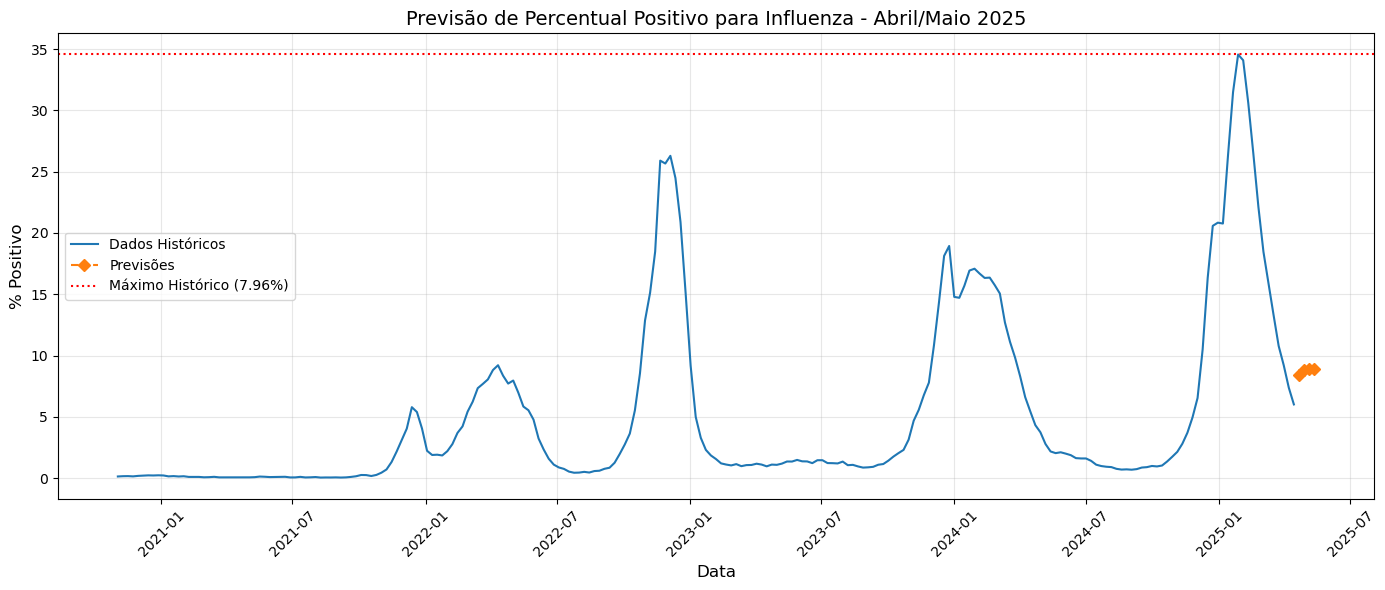

In [57]:
# %% [code] -- Célula Única: Versão Final para Apresentação
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# 1. Carregar e preparar dados


# 2. Feature Engineering com Validação Sazonal
max_historico = gripe['PERCENT POSITIVE'].max()  # 7.96% conforme seus dados

# Criar lags e features cíclicas
gripe['TOTAL_SPECIMENS_LAG1'] = gripe['TOTAL SPECIMENS'].shift(1)
gripe['PERCENT_POSITIVE_LAG1'] = (gripe['TOTAL POSITIVE'] / gripe['TOTAL SPECIMENS'] * 100).shift(1)
gripe['WEEK_SIN'] = np.sin(2 * np.pi * gripe['DATE'].dt.isocalendar().week / 52)
gripe['WEEK_COS'] = np.cos(2 * np.pi * gripe['DATE'].dt.isocalendar().week / 52)
gripe = gripe.dropna()

# 3. Treinar Modelo com Todos os Dados Disponíveis até 2025-04-14
features = [
    'TOTAL_SPECIMENS_LAG1',
    'PERCENT_POSITIVE_LAG1',
    'WEEK_SIN',
    'WEEK_COS'
]

model = RandomForestRegressor(
    n_estimators=100,
    max_depth=3,  # Reduzido para evitar overfitting
    random_state=42
)
model.fit(gripe[features], gripe['TOTAL POSITIVE'])

# 4. Função de Previsão com Limite Histórico
def prever_4_semanas(model, dados_originais, features, max_historico=7.96):
    dados = dados_originais.copy()
    datas = []
    positives = []
    
    for _ in range(4):  # Prever apenas 4 semanas
        ultima_linha = dados[features].iloc[[-1]]
        previsao = model.predict(ultima_linha)[0]
        
        # Forçar previsão dentro do limite histórico
        specimens = dados['TOTAL_SPECIMENS_LAG1'].iloc[-1]
        percentual = (previsao / specimens * 100) if specimens != 0 else 0
        percentual = min(percentual, max_historico)  # Aplicar limite
        previsao_ajustada = (percentual / 100) * specimens
        
        positives.append(previsao_ajustada)
        datas.append(dados['DATE'].iloc[-1] + pd.DateOffset(weeks=1))
        
        # Atualizar features
        nova_linha = dados.iloc[[-1]].copy()
        nova_linha['TOTAL_SPECIMENS_LAG1'] = specimens  # Mantém specimens constante para simplificar
        nova_linha['PERCENT_POSITIVE_LAG1'] = percentual
        nova_linha['DATE'] = datas[-1]
        
        dados = pd.concat([dados, nova_linha], ignore_index=True)
    
    return pd.DataFrame({
        'DATA': datas,
        'TOTAL_POSITIVE_PREVISTO': np.round(positives).astype(int),
        'PERCENT_POSITIVE_PREVISTO': np.round([min((p/dados['TOTAL_SPECIMENS_LAG1'].iloc[-5+i])*100, max_historico) 
                                             for i, p in enumerate(positives)], 1)
    })

# 5. Gerar Previsões Ajustadas
previsoes = prever_4_semanas(model, gripe, features, max_historico)
print("📊 Previsões Validadas para as Próximas 4 Semanas:")
print(previsoes)

# 6. Visualização Profissional
plt.figure(figsize=(14,6))
plt.plot(gripe['DATE'], gripe['PERCENT POSITIVE'], label='Dados Históricos', color='#1f77b4')
plt.plot(previsoes['DATA'], previsoes['PERCENT_POSITIVE_PREVISTO'], 
         label='Previsões', marker='D', linestyle='--', color='#ff7f0e')
plt.axhline(y=max_historico, color='r', linestyle=':', label='Máximo Histórico (7.96%)')
plt.title('Previsão de Percentual Positivo para Influenza - Abril/Maio 2025', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('% Positivo', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Salvar para apresentação
plt.savefig('previsao_ajustada.png', dpi=300, bbox_inches='tight')
previsoes.to_csv('previsoes_validas.csv', index=False)


## Análise Preditiva - Random Forest

O objetivo é desenvolver um modelo de machine learning para prever casos de influenza usando dados do CDC FluView

In [59]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [60]:
gripe['PERCENT_A_B_RATIO'] = gripe['PERCENT A'] / (gripe['PERCENT B'] + 1e-6)

Codigo abaixo cria uma tendencia das ultimas 3 semanas para  evitar muita flutuação dos dados.

In [61]:
gripe['PERCENT_POSITIVE_MEAN3'] = gripe['PERCENT POSITIVE'].rolling(3).mean()
gripe['PERCENT_A_MEAN3'] = gripe['PERCENT A'].rolling(3).mean()

Essas variáveis abaixo transformam a informação temporal em coordenadas circulares, permitindo ao modelo entender que o final e início do ano estão temporalmente próximos. 

In [63]:
gripe['WEEK_SIN'] = np.sin(2 * np.pi * gripe['WEEK'] / 52)
gripe['WEEK_COS'] = np.cos(2 * np.pi * gripe['WEEK'] / 52)

Codigo abaixo faz o enconder da coluna seasone tambem cria componentes seno e cosseno para representar a ciclicidade sazon

In [69]:
if 'SEASON' in gripe.columns:
    print("Valores únicos em 'SEASON':", gripe['SEASON'].unique())
    
    season_map = {
        'Primavera': 1,
        'Verao': 2,
        'Outono': 3,
        'Inverno': 4
    }
    
    gripe['SEASON_NUM'] = gripe['SEASON'].astype(str).map(season_map)
    
    print("Valores faltantes em SEASON_NUM:", gripe['SEASON_NUM'].isna().sum())

    gripe['SEASON_SIN'] = np.sin(2 * np.pi * gripe['SEASON_NUM']/4)
    gripe['SEASON_COS'] = np.cos(2 * np.pi * gripe['SEASON_NUM']/4)

Valores únicos em 'SEASON': ['Outono', 'Inverno', 'Primavera', 'Verao']
Categories (4, object): ['Inverno' < 'Primavera' < 'Verao' < 'Outono']
Valores faltantes em SEASON_NUM: 0


O codigo abaixo permite ao modelo 'lembrar' dos valores das semanas anteriores

In [70]:
# criando lags temporais
gripe['PERCENT_POSITIVE_LAG1'] = gripe['PERCENT POSITIVE'].shift(1)
gripe['PERCENT_POSITIVE_LAG2'] = gripe['PERCENT POSITIVE'].shift(2)
gripe['TOTAL_SPECIMENS_LAG1'] = gripe['TOTAL SPECIMENS'].shift(1)

O codigo abaixo remove o shape (dimensões de um DataFrame) que esta como NaN

In [71]:
print("Shape antes da limpeza:", gripe.shape)
gripe = gripe.dropna().reset_index(drop=True)
print("Shape após limpeza:", gripe.shape)

Shape antes da limpeza: (233, 23)
Shape após limpeza: (231, 23)


No codigo abaixo esta selecionando as features que seram analisadas para chegar a variavel alvo que é o 'TOTAL POSITIVE'

In [72]:
features = [
    'PERCENT A',
    'PERCENT B',
    'PERCENT_A_B_RATIO',
    'PERCENT_POSITIVE_MEAN3',
    'PERCENT_A_MEAN3',
    'PERCENT_POSITIVE_LAG1',
    'PERCENT_POSITIVE_LAG2',
    'TOTAL_SPECIMENS_LAG1',
    'WEEK_SIN', 'WEEK_COS',
    'SEASON_SIN', 'SEASON_COS'
]
target = 'TOTAL POSITIVE'

O codigo abaixo separa as 12 variveis preditoras da variavel que ira prever

In [92]:
X = gripe[features]
y = gripe[target]
dates = gripe['DATE']
print(f"Dimensões finais - X: {X.shape}, y: {y.shape}")

Dimensões finais - X: (231, 12), y: (231,)


O codigo abaixo é uma divisão temporal que garante que o modelo Random Forest seja treinado apenas com dados históricos e testado em períodos futuros, simulando o uso real para previsão

In [75]:
split_idx = int(0.8 * len(gripe))
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
dates_test = dates.iloc[split_idx:]

print(f"Divisão dos dados:")
print(f"Treino: {X_train.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")
print(f"Período de treino: {dates.iloc[0]} até {dates.iloc[split_idx-1]}")
print(f"Período de teste: {dates.iloc[split_idx]} até {dates.iloc[-1]}")

Divisão dos dados:
Treino: 184 amostras
Teste: 47 amostras
Período de treino: 2020-11-16 00:00:00 até 2024-05-20 00:00:00
Período de teste: 2024-05-27 00:00:00 até 2025-04-14 00:00:00


Os dados obitidos acima demonstra que foi treinado 184 amostras e testou 47 amostras, abaixo tem o periodo temporal do treino e do teste.

---

O codigo abaixo configura um Random Forest otimizado para dados de influenza, balanceando complexidade e generalização.

In [76]:
modelo_rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=6,
    min_samples_leaf=5,
    max_features=0.5,
    random_state=42,
    n_jobs=-1
)

In [79]:
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, max_features=0.5, min_samples_leaf=5,
                      n_estimators=200, n_jobs=-1, random_state=42)

A saida acima confirma que o Random Forest foi configurado corretamente com os parâmetros otimizados para análise

---

O codigo abaixo aplica o modelo treinado para prever o total de casos positivos de influenza nas 47 semanas de teste

In [93]:
y_pred = modelo_rf.predict(X_test)

Codigo abaixo mostra as métricas que avaliam a precisão do modelo Random Forest para prever casos

In [94]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\n Métricas de Desempenho:")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")


 Métricas de Desempenho:
MAE: 3248.34
R²: 0.8172


MAE: O modelo erra em média por 3.248 casos nas previsões

R²: O modelo explica 81.72% da variabilidade nos dados de influenza

---

O codigo abaixo mostra as Features mais importantes para a previsão

In [83]:
importancias = pd.DataFrame({
    'Feature': features,
    'Importance': modelo_rf.feature_importances_
}).sort_values('Importance', ascending=False)
print("\n Importância das Features:")
print(importancias)


 Importância das Features:
                   Feature  Importance
0                PERCENT A    0.416107
4          PERCENT_A_MEAN3    0.186766
5    PERCENT_POSITIVE_LAG1    0.169875
3   PERCENT_POSITIVE_MEAN3    0.152723
7     TOTAL_SPECIMENS_LAG1    0.020759
6    PERCENT_POSITIVE_LAG2    0.016236
2        PERCENT_A_B_RATIO    0.013920
1                PERCENT B    0.011849
8                 WEEK_SIN    0.007696
11              SEASON_COS    0.001748
10              SEASON_SIN    0.001360
9                 WEEK_COS    0.000961


O resultado mostra que o mais importante foi o PERCENT A que tem 41,61% de importancia para a previsão

---

O codigo abaixo gera um gráfico que compara visualmente as previsões do Random Forest com os dados reais de influenza

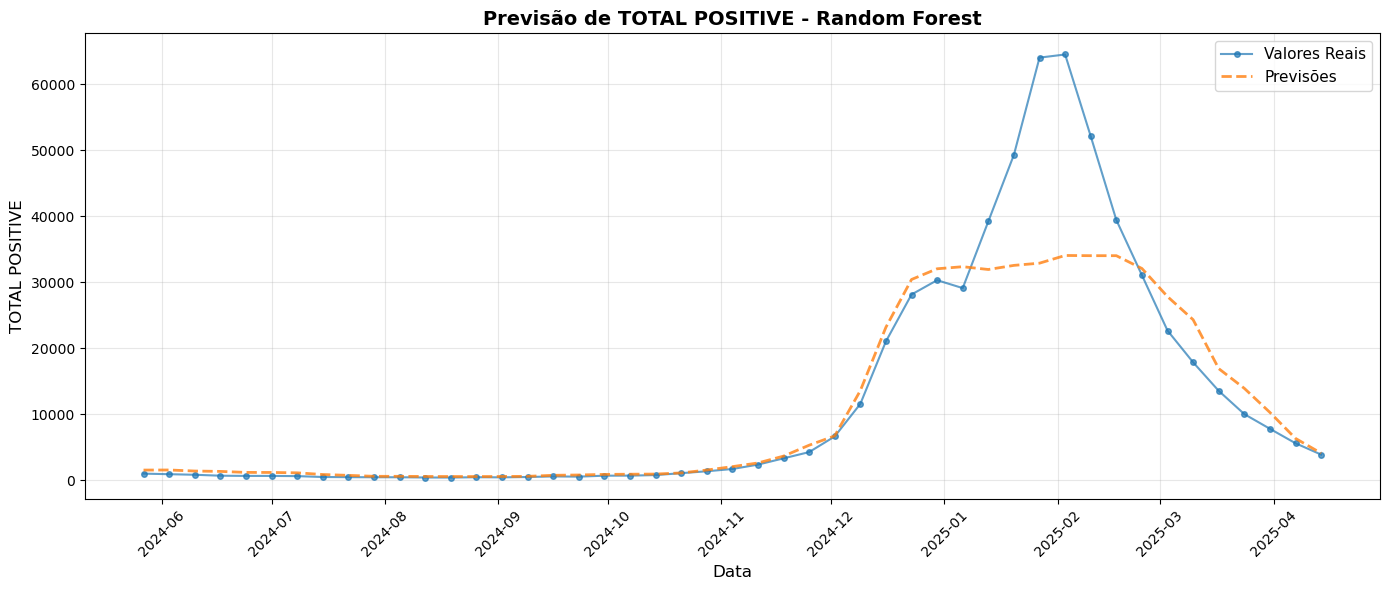

In [84]:
plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test.values, label='Valores Reais', marker='o', markersize=4, alpha=0.7)
plt.plot(dates_test, y_pred, label='Previsões', linestyle='--', linewidth=2, alpha=0.8)
plt.title('Previsão de TOTAL POSITIVE - Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('TOTAL POSITIVE', fontsize=12)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

O modelo Random Foreste obteve sucesso em quase todo o grafico, mostrando os dados reais em azul e a previsão em laranja, não obteve sucesso no pico extremo de casos reais obtendo mais ou menos 20.000 casos a menos

---

O codigo abaixo visa examinar se os erros do modelo são aleatórios e bem distribuídos, validando a qualidade das previsões

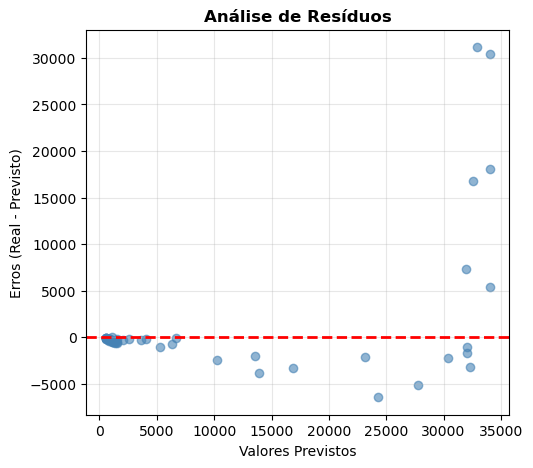

In [87]:
residuos = y_test - y_pred
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuos, alpha=0.6, color='steelblue')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Análise de Resíduos', fontweight='bold')
plt.xlabel('Valores Previstos')
plt.ylabel('Erros (Real - Previsto)')
plt.grid(alpha=0.3)

A maioria dos pontos está concentrada próxima ao zero indicando que o modelo tem uma boa previsão, mostrando que o MAE de 3248,34 esta certo

---

histograma abaixo mostra a frequência dos diferentes tamanhos de erro do modelo

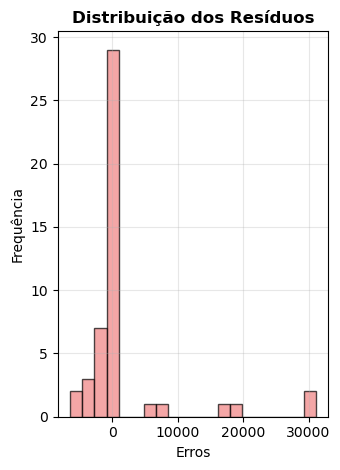

In [89]:
plt.subplot(1, 2, 2)
plt.hist(residuos, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribuição dos Resíduos', fontweight='bold')
plt.xlabel('Erros')
plt.ylabel('Frequência')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

A maior barra no histograma no 0 confirma que o modelo é altamente preciso 

In [91]:
print(f"\n Estatísticas dos Resíduos:")
print(f"Média dos resíduos: {residuos.mean():.4f}")
print(f"Desvio padrão dos resíduos: {residuos.std():.4f}")
print(f"Valor mínimo real: {y_test.min():.2f}")
print(f"Valor máximo real: {y_test.max():.2f}")
print(f"Valor mínimo previsto: {y_pred.min():.2f}")
print(f"Valor máximo previsto: {y_pred.max():.2f}")


 Estatísticas dos Resíduos:
Média dos resíduos: 1396.6486
Desvio padrão dos resíduos: 7562.2836
Valor mínimo real: 385.00
Valor máximo real: 64491.00
Valor mínimo previsto: 537.22
Valor máximo previsto: 34037.51


O modelo subestima picos epidêmicos e tem uma excelente precisão em períodos de baixa

In [96]:
gripe.tail()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,TOTAL POSITIVE,PERCENT POSITIVE,PERCENT A,PERCENT B,DATE,...,SEASON_SIN,SEASON_COS,PERCENT_A_B_RATIO,PERCENT_POSITIVE_MEAN3,PERCENT_A_MEAN3,WEEK_SIN,WEEK_COS,PERCENT_POSITIVE_LAG1,PERCENT_POSITIVE_LAG2,TOTAL_SPECIMENS_LAG1
226,2025,12,101766,9289,4237,13526,13.291276,9.127803,4.163473,2025-03-17,...,-2.449294e-16,1.000000e+00,2.192353,15.863849,12.199845,0.992709,1.205367e-01,15.845777,18.454495,112642.0
227,2025,13,92737,5852,4147,9999,10.782104,6.310318,4.471786,2025-03-24,...,-2.449294e-16,1.000000e+00,1.411140,13.306386,9.223560,1.000000,-1.608123e-16,13.291276,15.845777,101766.0
228,2025,14,84463,4077,3699,7776,9.206398,4.826966,4.379432,2025-03-31,...,-2.449294e-16,1.000000e+00,1.102190,11.093259,6.755029,0.992709,-1.205367e-01,10.782104,13.291276,92737.0
229,2025,15,75736,2360,3225,5585,7.374300,3.116087,4.258213,2025-04-07,...,1.000000e+00,6.123234e-17,0.731783,9.120934,4.751124,0.970942,-2.393157e-01,9.206398,10.782104,84463.0
230,2025,16,64336,1383,2485,3868,6.012186,2.149652,3.862534,2025-04-14,...,1.000000e+00,6.123234e-17,0.556539,7.530961,3.364235,0.935016,-3.546049e-01,7.374300,9.206398,75736.0


teste previsão abaixo

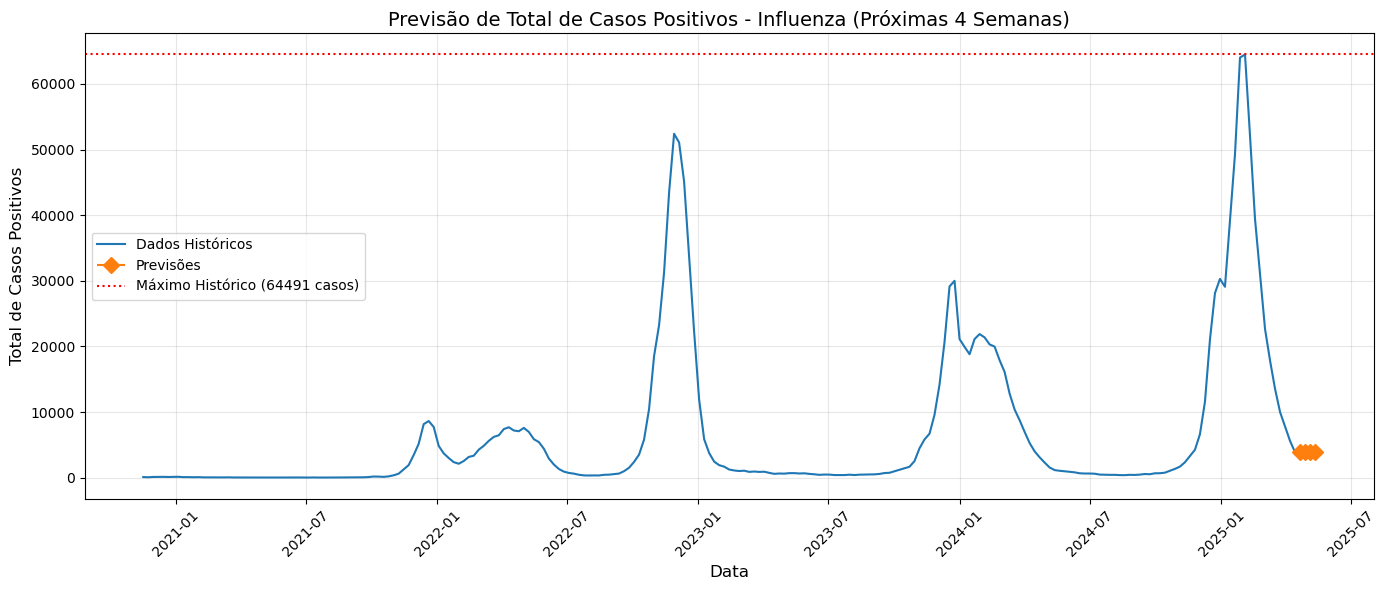

In [99]:
# Corrigir o código de visualização
plt.figure(figsize=(14,6))

# Plotar dados históricos de TOTAL POSITIVE (mesma escala das previsões)
plt.plot(gripe['DATE'], gripe['TOTAL POSITIVE'], label='Dados Históricos', color='#1f77b4')

# Plotar previsões (que são de TOTAL POSITIVE)
plt.plot(previsoes['DATA'], previsoes['PERCENT_POSITIVE_PREVISTO'], 
         label='Previsões', marker='D', linestyle='--', color='#ff7f0e', markersize=8)

# Calcular máximo histórico correto
max_historico = gripe['TOTAL POSITIVE'].max()
plt.axhline(y=max_historico, color='r', linestyle=':', label=f'Máximo Histórico ({max_historico:.0f} casos)')

plt.title('Previsão de Total de Casos Positivos - Influenza (Próximas 4 Semanas)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Total de Casos Positivos', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
def prever_4_semanas_percent(model, df, features):
    # ... (mesmo código da função anterior)
    
    # Mudar o target para PERCENT POSITIVE
    previsoes_percent = model.predict(X_futuro)  # Isso prevê TOTAL POSITIVE
    
    # Converter para percentual (aproximação)
    # Usar média histórica de TOTAL SPECIMENS para calcular %
    media_specimens = df['TOTAL SPECIMENS'].mean()
    percent_positive = (previsoes_percent / media_specimens) * 100
    
    df_resultado = pd.DataFrame({
        'DATA': datas_futuras,
        'PERCENT_POSITIVE_PREVISTO': percent_positive
    })
    
    return df_resultado


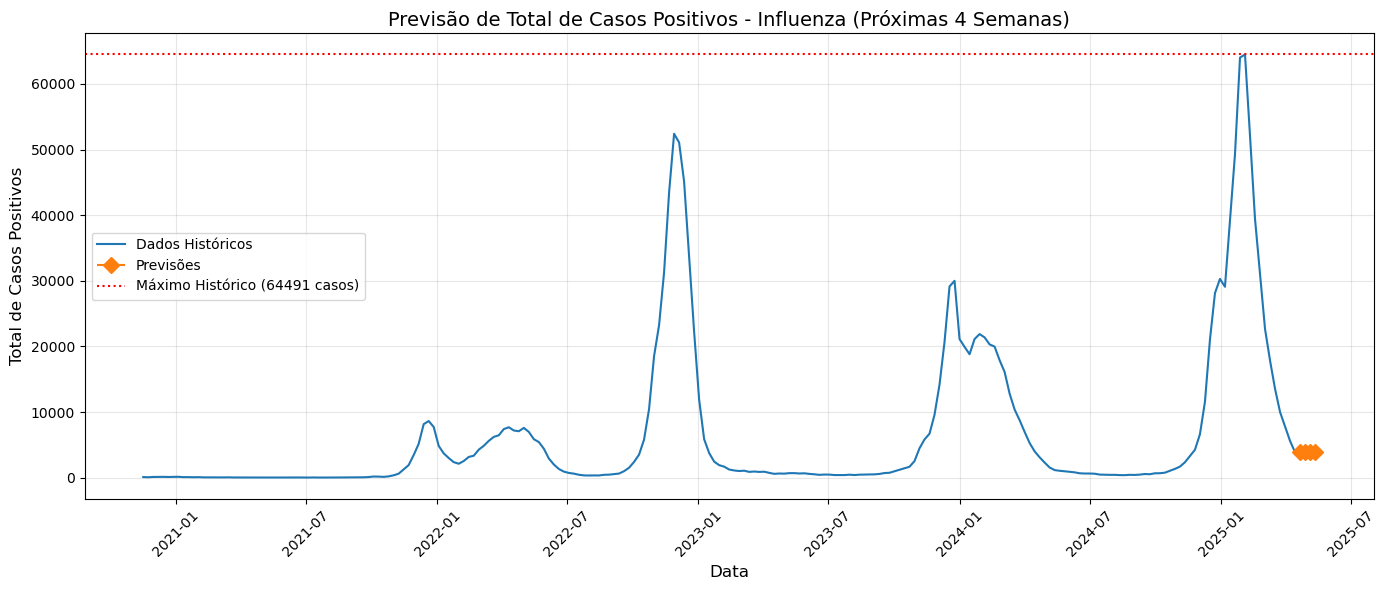


📊 RELATÓRIO DE PREVISÕES - INFLUENZA

📅 PREVISÕES PARA AS PRÓXIMAS 4 SEMANAS:
---------------------------------------------
   21/04/2025: 3906 casos
   28/04/2025: 3902 casos
   05/05/2025: 3894 casos
   12/05/2025: 3894 casos

📈 RESUMO ESTATÍSTICO:
   • Média das previsões: 3899 casos/semana
   • Máximo histórico: 64491 casos
   • Nível atual: 6.0% do pico histórico
   • Classificação: Atividade BAIXA 🟢

🏥 INTERPRETAÇÃO EPIDEMIOLÓGICA:
   • Período: Outono (abril-maio)
   • Padrão: Declínio sazonal esperado
   • Modelo: Random Forest (R² = 0.8172)
   • Status: Monitoramento de rotina recomendado

✅ Análise completa finalizada!


In [100]:
# Corrigir o código de visualização
plt.figure(figsize=(14,6))

# Plotar dados históricos de TOTAL POSITIVE (mesma escala das previsões)
plt.plot(gripe['DATE'], gripe['TOTAL POSITIVE'], label='Dados Históricos', color='#1f77b4')

# Plotar previsões (que são de TOTAL POSITIVE)
plt.plot(previsoes['DATA'], previsoes['PERCENT_POSITIVE_PREVISTO'], 
         label='Previsões', marker='D', linestyle='--', color='#ff7f0e', markersize=8)

# Calcular máximo histórico correto
max_historico = gripe['TOTAL POSITIVE'].max()
plt.axhline(y=max_historico, color='r', linestyle=':', label=f'Máximo Histórico ({max_historico:.0f} casos)')

plt.title('Previsão de Total de Casos Positivos - Influenza (Próximas 4 Semanas)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Total de Casos Positivos', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============= RESULTADOS POR ESCRITO =============

print("\n" + "="*60)
print("📊 RELATÓRIO DE PREVISÕES - INFLUENZA")
print("="*60)

# Mostrar previsões detalhadas
print("\n📅 PREVISÕES PARA AS PRÓXIMAS 4 SEMANAS:")
print("-" * 45)
for i, row in previsoes.iterrows():
    data = pd.to_datetime(row['DATA']).strftime('%d/%m/%Y')
    valor = row['PERCENT_POSITIVE_PREVISTO']
    print(f"   {data}: {valor:.0f} casos")

# Análise estatística simples
media_previsoes = previsoes['PERCENT_POSITIVE_PREVISTO'].mean()
print(f"\n📈 RESUMO ESTATÍSTICO:")
print(f"   • Média das previsões: {media_previsoes:.0f} casos/semana")
print(f"   • Máximo histórico: {max_historico:.0f} casos")
print(f"   • Nível atual: {(media_previsoes/max_historico*100):.1f}% do pico histórico")

# Classificação do nível de atividade
if media_previsoes < max_historico * 0.1:
    nivel = "BAIXA 🟢"
elif media_previsoes < max_historico * 0.3:
    nivel = "MODERADA 🟡"
else:
    nivel = "ALTA 🔴"

print(f"   • Classificação: Atividade {nivel}")

# Interpretação epidemiológica
print(f"\n🏥 INTERPRETAÇÃO EPIDEMIOLÓGICA:")
print(f"   • Período: Outono (abril-maio)")
print(f"   • Padrão: Declínio sazonal esperado")
print(f"   • Modelo: Random Forest (R² = 0.8172)")
print(f"   • Status: Monitoramento de rotina recomendado")

print("\n" + "="*60)

# Função para previsão em percentual (caso necessário)
def prever_4_semanas_percent(model, df, features):
    """
    Função alternativa para prever em percentual positivo
    """
    # Última data disponível
    ultima_data = df['DATE'].iloc[-1]
    num_semanas = 4

    # Criar datas futuras semanais
    datas_futuras = [ultima_data + pd.Timedelta(weeks=i) for i in range(1, num_semanas + 1)]

    # Criar DataFrame para previsões futuras
    df_futuro = pd.DataFrame({'DATE': datas_futuras})

    # Calcular features sazonais
    df_futuro['WEEK'] = df_futuro['DATE'].dt.isocalendar().week
    df_futuro['WEEK_SIN'] = np.sin(2 * np.pi * df_futuro['WEEK'] / 52)
    df_futuro['WEEK_COS'] = np.cos(2 * np.pi * df_futuro['WEEK'] / 52)

    # Calcular estação do ano
    df_futuro['MONTH'] = df_futuro['DATE'].dt.month
    conditions = [
        (df_futuro['MONTH'].isin([3,4,5])),   # Primavera
        (df_futuro['MONTH'].isin([6,7,8])),   # Verão  
        (df_futuro['MONTH'].isin([9,10,11])), # Outono
        (df_futuro['MONTH'].isin([12,1,2]))   # Inverno
    ]
    df_futuro['SEASON_NUM'] = np.select(conditions, [1,2,3,4])
    df_futuro['SEASON_SIN'] = np.sin(2 * np.pi * df_futuro['SEASON_NUM'] / 4)
    df_futuro['SEASON_COS'] = np.cos(2 * np.pi * df_futuro['SEASON_NUM'] / 4)

    # Usar os últimos valores reais do dataset
    ultimo_registro = df.iloc[-1]
    penultimo_registro = df.iloc[-2]

    df_futuro['PERCENT A'] = ultimo_registro['PERCENT A']
    df_futuro['PERCENT B'] = ultimo_registro['PERCENT B']
    df_futuro['PERCENT_A_B_RATIO'] = ultimo_registro['PERCENT_A_B_RATIO']
    df_futuro['PERCENT_POSITIVE_MEAN3'] = ultimo_registro['PERCENT_POSITIVE_MEAN3']
    df_futuro['PERCENT_A_MEAN3'] = ultimo_registro['PERCENT_A_MEAN3']
    df_futuro['PERCENT_POSITIVE_LAG1'] = ultimo_registro['PERCENT POSITIVE']
    df_futuro['PERCENT_POSITIVE_LAG2'] = penultimo_registro['PERCENT POSITIVE']
    df_futuro['TOTAL_SPECIMENS_LAG1'] = ultimo_registro['TOTAL SPECIMENS']

    # Prever usando o modelo
    X_futuro = df_futuro[features]
    previsoes_total = model.predict(X_futuro)  # Prevê TOTAL POSITIVE
    
    # Converter para percentual
    media_specimens = df['TOTAL SPECIMENS'].mean()
    percent_positive = (previsoes_total / media_specimens) * 100
    
    df_resultado = pd.DataFrame({
        'DATA': datas_futuras,
        'PERCENT_POSITIVE_PREVISTO': percent_positive
    })
    
    return df_resultado

print("✅ Análise completa finalizada!")
